In [749]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
import numpy as np

In [750]:
dataset=pd.read_csv(r'C:\Users\HP\Desktop\pathao\calls.csv')

In [751]:
dataset.drop(columns=["2024-01-25 18:34:14","00:08:01","00:14:46","1.2"],inplace=True)

In [752]:
dataset

,28,45,1,2,2.1,W,1.1,2024-01-25,2024-01-25 18:26:13,00:06:45,2024-01-25 18:34:01,2024-01-25 18:34:14.1
0,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,00:13:39,2024-01-25 18:34:16,2024-01-25 18:34:24
1,30,48,2,2,2,NR,1,2024-01-25,2024-01-25 18:34:53,00:00:13,2024-01-25 18:34:53,2024-01-25 18:34:53
2,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,00:10:17,2024-01-25 18:35:14,2024-01-25 18:35:18
3,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,00:00:29,2024-01-25 18:35:58,2024-01-25 18:37:00
4,35,49,2,8,7,NR,2,2024-01-25,2024-01-25 18:36:48,00:02:03,2024-01-25 18:37:08,2024-01-25 18:37:08
...,...,...,...,...,...,...,...,...,...,...,...,...
3348,4017,3414,2,7,11,NR,90,2024-02-16,2024-02-16 17:27:13,00:46:25,2024-02-16 17:27:13,2024-02-16 17:53:11
3349,4018,3415,2,4,12,NR,91,2024-02-16,2024-02-16 17:32:23,00:40:11,2024-02-16 17:32:23,2024-02-16 17:45:01
3350,4019,3416,2,8,7,NR,92,2024-02-16,2024-02-16 17:33:04,00:28:56,2024-02-16 17:33:04,2024-02-16 17:34:17
3351,4020,3417,2,9,4,NR,93,2024-02-16,2024-02-16 17:34:58,00:08:03,2024-02-16 17:34:58,2024-02-16 17:35:00


In [753]:
dataset.drop(columns=["W","2024-01-25","2024-01-25 18:26:13","00:06:45","2024-01-25 18:34:01","2024-01-25 18:34:14.1"],inplace=True)

In [754]:
dataset.head()

,28,45,1,2,2.1,1.1
0,29,46,1,2,2,2
1,30,48,2,2,2,1
2,31,47,1,2,2,3
3,32,50,3,3,2,1
4,35,49,2,8,7,2


In [755]:
dataset.isnull().sum()

28     0
45     0
1      0
2      0
2.1    0
1.1    0
dtype: int64

In [756]:
dataset.describe()

,28,45,1,2,2.1,1.1
count,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000
mean,1985.106174,1736.770057,1.599165,5.234119,8.948404,41.971667
std,1135.043109,972.864935,0.619222,2.916152,3.245985,28.305740
min,29.000000,46.000000,1.000000,1.000000,2.000000,1.000000
25%,1013.000000,900.000000,1.000000,3.000000,6.000000,17.000000
50%,1947.000000,1738.000000,2.000000,5.000000,9.000000,40.000000
75%,2961.000000,2579.000000,2.000000,8.000000,12.000000,64.000000
max,4021.000000,3417.000000,3.000000,10.000000,15.000000,119.000000


In [757]:
dataset

,28,45,1,2,2.1,1.1
0,29,46,1,2,2,2
1,30,48,2,2,2,1
2,31,47,1,2,2,3
3,32,50,3,3,2,1
4,35,49,2,8,7,2
...,...,...,...,...,...,...
3348,4017,3414,2,7,11,90
3349,4018,3415,2,4,12,91
3350,4019,3416,2,8,7,92
3351,4020,3417,2,9,4,93


In [758]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)
dataset["28_update"]= ft.fit_transform(dataset[["28"]])

In [759]:
dataset["45_update"]= ft.fit_transform(dataset[["45"]])

In [760]:
dataset["1.1_update"]= ft.fit_transform(dataset[["1.1"]])
dataset

,28,45,1,2,2.1,1.1,28_update,45_update,1.1_update
0,29,46,1,2,2,2,3.401197,3.850148,1.098612
1,30,48,2,2,2,1,3.433987,3.891820,0.693147
2,31,47,1,2,2,3,3.465736,3.871201,1.386294
3,32,50,3,3,2,1,3.496508,3.931826,0.693147
4,35,49,2,8,7,2,3.583519,3.912023,1.098612
...,...,...,...,...,...,...,...,...,...
3348,4017,3414,2,7,11,90,8.298540,8.135933,4.510860
3349,4018,3415,2,4,12,91,8.298788,8.136226,4.521789
3350,4019,3416,2,8,7,92,8.299037,8.136518,4.532599
3351,4020,3417,2,9,4,93,8.299286,8.136811,4.543295


In [761]:
dataset["1_update"]= ft.fit_transform(dataset[["1"]])
dataset["2_update"]= ft.fit_transform(dataset[["2"]])
dataset["2.1_update"]= ft.fit_transform(dataset[["2.1"]])


In [762]:
dataset.drop(columns=["28","45","1.1","2","1","2.1"],inplace=True)


In [763]:
dataset

,28_update,45_update,1.1_update,1_update,2_update,2.1_update
0,3.401197,3.850148,1.098612,0.693147,1.098612,1.098612
1,3.433987,3.891820,0.693147,1.098612,1.098612,1.098612
2,3.465736,3.871201,1.386294,0.693147,1.098612,1.098612
3,3.496508,3.931826,0.693147,1.386294,1.386294,1.098612
4,3.583519,3.912023,1.098612,1.098612,2.197225,2.079442
...,...,...,...,...,...,...
3348,8.298540,8.135933,4.510860,1.098612,2.079442,2.484907
3349,8.298788,8.136226,4.521789,1.098612,1.609438,2.564949
3350,8.299037,8.136518,4.532599,1.098612,2.197225,2.079442
3351,8.299286,8.136811,4.543295,1.098612,2.302585,1.609438


In [764]:
dataset.describe()

,28_update,45_update,1.1_update,1_update,2_update,2.1_update
count,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000
mean,7.325302,7.200062,3.429367,0.927657,1.693842,2.237322
std,0.879351,0.861415,0.948973,0.233195,0.554795,0.358763
min,3.401197,3.850148,0.693147,0.693147,0.693147,1.098612
25%,6.921658,6.803505,2.890372,0.693147,1.386294,1.945910
50%,7.574558,7.461066,3.713572,1.098612,1.791759,2.302585
75%,7.993620,7.855545,4.174387,1.098612,2.197225,2.564949
max,8.299535,8.136811,4.787492,1.386294,2.397895,2.772589


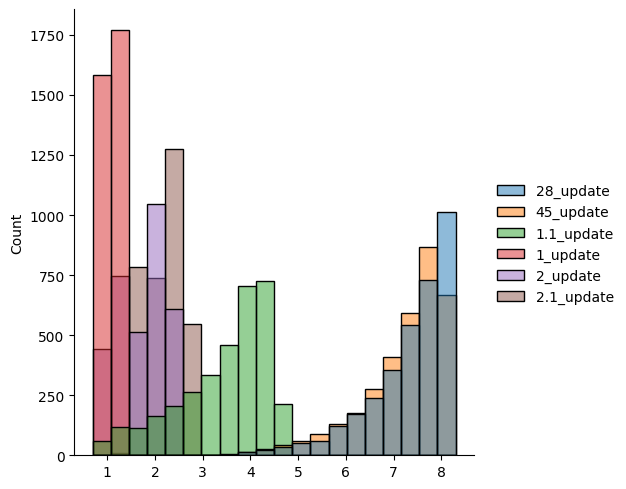

In [765]:
sns.displot(dataset)

C:\Users\HP\AppData\Local\Temp\ipykernel_15900\3612651609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset)


<Axes: ylabel='Density'>

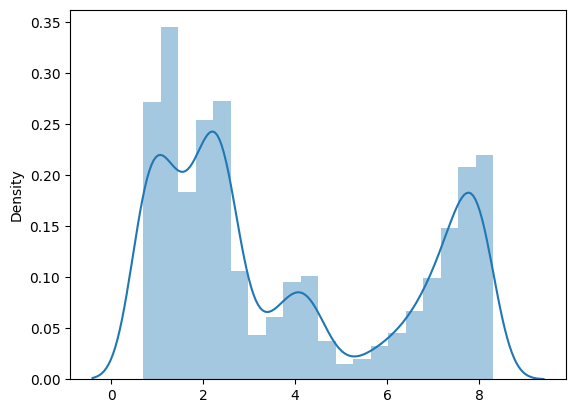

In [766]:
sns.distplot(dataset)

In [767]:
x=dataset.iloc[:,:-1]
x.shape

(3353, 5)

In [768]:
y=dataset["1.1_update"]

In [769]:
from sklearn.linear_model import LinearRegression

In [770]:
lr=LinearRegression()


In [771]:
fs=SequentialFeatureSelector(lr,k_features=5,forward=True)


In [772]:
fs.fit(x,y)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\HP\AppD

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

In [773]:
fs.k_feature_names_

('28_update', '45_update', '1.1_update', '1_update', '2_update')

In [774]:
fs.feature_names

['28_update', '45_update', '1.1_update', '1_update', '2_update']

In [775]:
fs.k_score_

1.0